In [0]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


In [0]:
net = cv2.dnn.readNetFromCaffe('/content/deploy.prototxt.txt', '/content/res10_300x300_ssd_iter_140000.caffemodel')

image = cv2.imread('/content/img1.jpg')
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
(h, w) = image.shape[:2]
blob = cv2.dnn.blobFromImage(cv2.resize(image, (300, 300)), 1.0,
	(300, 300), (104.0, 177.0, 123.0))
# plt.imshow(image)
net.setInput(blob)
detections = net.forward()

In [0]:
# print("[INFO] computing object detections...")


In [94]:
print(detections[0][0][0][2])
print(detections[0][0][0][3:7])
print(np.array([w,h,w,h]))
print(detections[0][0][0][3:7]*np.array([w,h,w,h]))

0.99947685
[0.5481906  0.350381   0.68351436 0.57451904]
[2576 1932 2576 1932]
[1412.13896942  676.93606675 1760.73298264 1109.9707818 ]


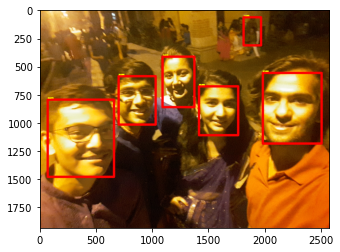

In [89]:
for i in range(0, detections.shape[2]):
  confidence = detections[0, 0, i, 2]
  if confidence > 0.13:
    box=detections[0,0,i,3:7]*np.array([w,h,w,h])
    (startX, startY, endX, endY) = box.astype("int")
    text="{:.2f}%".format(confidence * 100)
    y=startY - 10 if startY - 10 > 10 else startY + 10
    cv2.rectangle(image, (startX, startY), (endX, endY),(255, 0, 0), 20)	
    cv2.putText(image, text, (startX, y),cv2.FONT_HERSHEY_SIMPLEX,0.45, (255,255,0), 2,cv2.LINE_AA)	 
plt.imshow(image)  

In [90]:
print(text)

14.06%
